In [1]:
import random
import pandas as pd
import statistics

In [2]:
rules ={
    "a" : ['a', 'b'],
    "b" : ['b','c'],
    "c" : ['c']
}

In [3]:
def count_occu(se):
    count_a=[]
    count_b=[]
    count_c=[]
    for e in se:
        count_a.append(e[0].count('a'))
        count_b.append(e[0].count('b'))
        count_c.append(e[0].count('b'))
    print("This class contains an average of {:.2f} a's, {:.2f} b's and {:.2f} c's over all words".format(statistics.mean(count_a), statistics.mean(count_b),statistics.mean(count_c)))

In [4]:
def expand_random(start,stop):
    if len(start) == stop:
        return start
    if (rules[start[-1]] and len(start)<100) :            
        element = random.choice(rules[start[-1]])
        start = start + element
        return expand_random(start,stop)
    


    return start

In [5]:
def gen_random():
    start ='a'
    stop = random.randint(10,100)
    return expand_random(start,stop)
    
    

In [6]:
def add_char(a,b,c):
    word=''
    for i in range(1,a+1):
        word = word +'a'
    for i in range(1,b+1):
        word = word +'b'
    for i in range(1,c+1):
        word = word +'c'
    return word

### Generating class 1

In [7]:
a_count=33
b_count =1
c_count=66
dict_list=[]

In [8]:

while a_count>0 :
    for i in range(0,b_count):
        temp=add_char(a_count,i+1,c_count)
        if len(temp)>9:
            dict_list.append([temp,1])

    a_count = a_count -1
    c_count =c_count - 2
    b_count = b_count +3
    
    

In [9]:
count_occu(dict_list)

This class contains an average of 11.51 a's, 33.50 b's and 33.50 c's over all words


### Generating class 2

In [10]:
dict_list_b=[] 
for i in range(4000):    
    b=[gen_random(),0]
    dict_list_b.append(b)
res = []
[res.append(x) for x in dict_list_b if x not in res]
dict_list_b=res

In [11]:
count_occu(dict_list_b)

This class contains an average of 2.75 a's, 2.75 b's and 2.75 c's over all words


In [12]:
dict_list.extend(dict_list_b)
random.shuffle(dict_list)

In [13]:
df = pd.DataFrame(dict_list, columns=['Words','Class'])

In [14]:
df.head(20)

,Words,Class
0,abbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb...,1
1,aaabbccccccccccccccccccccccccccccccccccccccccc...,0
2,abbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb...,1
3,abbbcccccccccccccccccccccccccccccccccccccccccc...,0
4,aaaaaaaaaaaaaaaabbbbbbbbbbbbcccccccccccccccccc...,1
5,abbccccccccccccccccccccccccccccccccccccccccccc...,0
6,aaaaaaaaaaaaabbbbbbbbbbbbbbbcccccccccccccccccc...,1
7,aaaaaaabbbcccccccccccccccccccccccccccccccccccc...,0
8,aaaaaaaaaaaaaaaaabbbbbbbbbbbbbbbbbbbbbbbbbbbbb...,1
9,aabbbbcccccccccccccccccccccccccccccccccccccccc...,0


<AxesSubplot:ylabel='Frequency'>

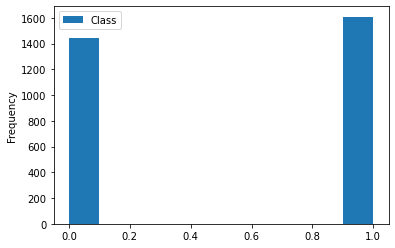

In [15]:
df.plot.hist()

In [16]:
df['Class'].value_counts()

1    1608
0    1444
Name: Class, dtype: int64

In [17]:
df.to_csv('cfg_dataset1.csv', encoding='utf-8',header=True,index=False)